In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Merging all CSV in single file

In [12]:
# loading all files at once

files = [file for file in os.listdir("./Sales_Data")]

#printinf all files

for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [13]:
# concate all dataframes
adf=pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    adf=pd.concat([adf,df])


In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [19]:
#saving concated file in csv format

adf.to_csv("merged_csv", index=False)

Cleaning

In [26]:
adf.isnull().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
month               True
dtype: bool

In [27]:
#droping NaN

adf=adf.dropna()

In [28]:
adf.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
month               False
dtype: bool

In [31]:
#findinf OR and Delete it

temp=adf[adf["Order Date"].str[0:2]=="Or"]


In [33]:
temp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [34]:
#droping "Or"

adf=adf[adf["Order Date"].str[0:2]!="Or"]

Adding Few Cols

In [35]:
# adding few cols
# month col

adf["month"]=adf["Order Date"].str[0:2]

# strnig to int

adf["month"]=adf["month"].astype("int32")

In [23]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [37]:
#add sales col

adf["Sales"]=adf["Quantity Ordered"]*adf["Price Each"]

In [38]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Best month for Sales

In [50]:
adf.groupby("month").sum()

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<function matplotlib.pyplot.show(close=None, block=None)>

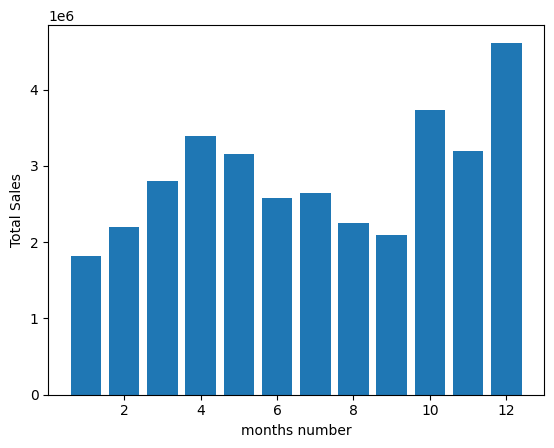

In [54]:
#ploting
result=adf.groupby("month").sum()
months=range(1,13)
plt.bar(months, result["Sales"])
plt.xlabel("months number")
plt.ylabel("Total Sales")

plt.show

City with Highest Sale

In [64]:
# Extracting city col
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

adf["City"]=adf["Purchase Address"].apply(lambda x: get_city(x)+''+ get_state(x))

In [65]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,col,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,DallasTX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,BostonMA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los AngelesCA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los AngelesCA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los AngelesCA


In [67]:
result=adf.groupby("City").sum()

result

,Quantity Ordered,Price Each,month,Sales
City,,,,
AtlantaGA,16602,2.779908e+06,104794,2.795499e+06
AustinTX,11153,1.809874e+06,69829,1.819582e+06
BostonMA,22528,3.637410e+06,141112,3.661642e+06
DallasTX,16730,2.752628e+06,104620,2.767975e+06
Los AngelesCA,33289,5.421435e+06,208325,5.452571e+06
New York CityNY,27932,4.635371e+06,175741,4.664317e+06
PortlandME,2750,4.471893e+05,17144,4.497583e+05
PortlandOR,11303,1.860558e+06,70621,1.870732e+06
San FranciscoCA,50239,8.211462e+06,315520,8.262204e+06


<function matplotlib.pyplot.show(close=None, block=None)>

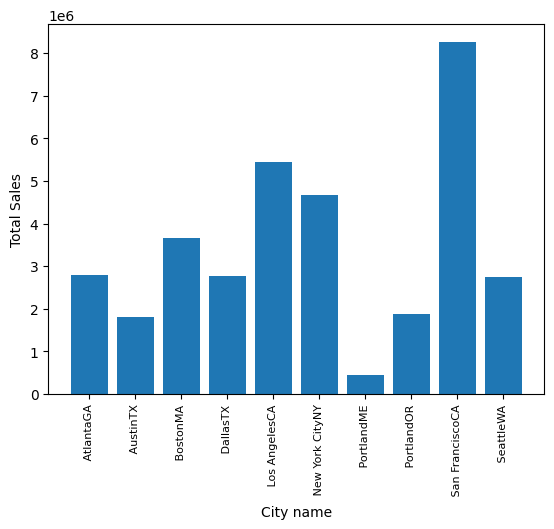

In [74]:
#ploting

City=[city for city, df in adf.groupby("City")]
plt.bar(City, result["Sales"])
plt.xlabel("City name")
plt.ylabel("Total Sales")
plt.xticks(City, rotation="vertical", size=8)
plt.show

Perfect time for Advertisements

In [76]:
adf["Order Date"]=pd.to_datetime(adf["Order Date"])

In [79]:
adf["Hour"]=adf["Order Date"].dt.hour
adf["Minute"]=adf["Order Date"].dt.minute

In [80]:
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,col,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,BostonMA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los AngelesCA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los AngelesCA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los AngelesCA,9,27


In [ ]:
#ploting

